In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor

In [3]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [4]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [5]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [6]:
all_files = os.listdir('Rectificador')
files = []
for i in range(len(all_files)):
    files.append(all_files[i])
files

['8000.csv',
 '1500.csv',
 '1000.csv',
 '3000.csv',
 '7000.csv',
 '2000.csv',
 '6000.csv',
 '9000.csv',
 '10000.csv',
 '4000.csv',
 '8200000.csv',
 '5000.csv',
 '3500.csv',
 '100.csv',
 'no.csv',
 '.ipynb_checkpoints',
 '2500.csv',
 '500.csv']

In [7]:
files = ['100.csv','500.csv','1000.csv','1500.csv','2000.csv','2500.csv','3000.csv','3500.csv','4000.csv','5000.csv','6000.csv','7000.csv','8000.csv','9000.csv','10000.csv',
         '8200000.csv']

In [26]:
func = lambda R,T : T/np.sqrt(3)/(2*R*4.97*1e-6-T)
x_adj = np.linspace(min(Rs),max(Rs),100)
y_adj = func(x_adj,1/30)
np.array(Rs)*4.97*1e-6/(1/30)

array([0.01491, 0.07455, 0.1491 , 0.22365, 0.2982 , 0.37275, 0.4473 ,
       0.52185, 0.5964 , 0.7455 , 0.8946 , 1.0437 , 1.1928 , 1.3419 ])

In [121]:
ripples

[1.2755180235854573,
 1.1525329874002659,
 0.9777439518265172,
 0.7774347880666826,
 0.6350640995868704,
 0.5382316733352512,
 0.46552967917633314,
 0.4121346545564855,
 0.36715877997457985,
 0.3010928446406965,
 0.2543374268321818,
 0.22123582894586405,
 0.1960591626188176,
 0.17467685302941616,
 0.15917497608885942,
 0.008219378834683617]

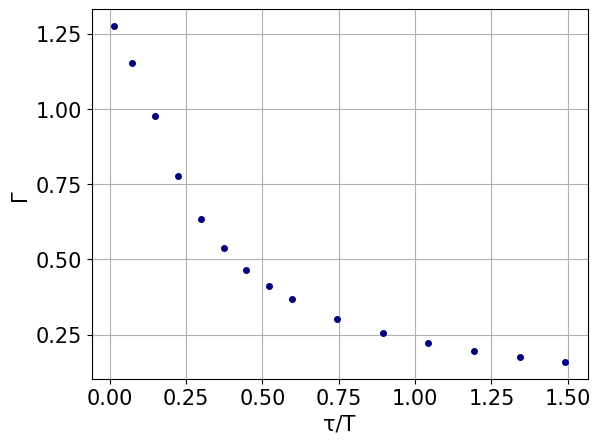

In [122]:
T0 = 1/30 # s

ripples = []
Rs = []
for file in files[:-1]:
    df = pd.read_csv(f'Rectificador/{file}')
    start_time = df.t.iloc[100]
    end_time = start_time + T0
    period_df = df[(df['t'] >= start_time) & (df['t'] <= end_time)]

    avg = np.mean(period_df.V_out)    
    ripple_rms = np.sqrt(np.mean((period_df.V_out-avg)**2))
    ripples.append(ripple_rms/avg)
    Rs.append(float(file[:-4]))
plt.scatter(np.array(Rs)*4.97*1e-6*30,ripples,c='navy')
plt.grid()
plt.xlabel('\u03C4/T')
plt.ylabel('\u0393')
plt.locator_params(axis='x', nbins=7)
plt.locator_params(axis='y', nbins=6)
#plt.plot(x_adj,y_adj,'crimson')
#plt.savefig('plots/ripple.png',bbox_inches='tight')

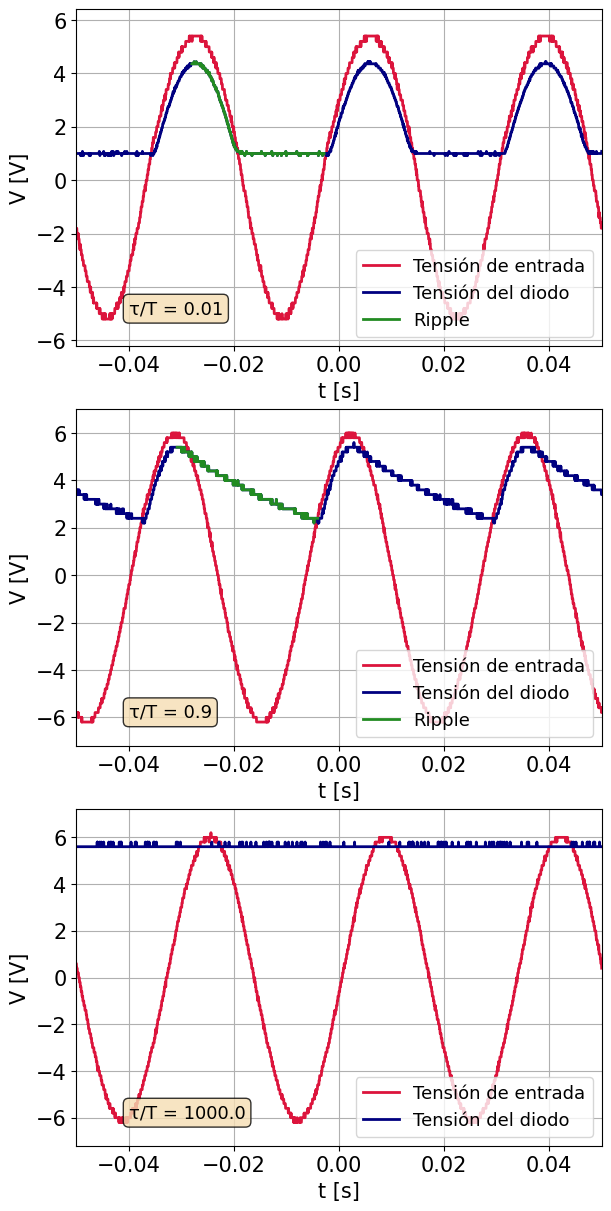

In [115]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
resistinhas = [100,6000,8.2*1e6]
my_files = [files[0],files[10],files[-1]]
fig,axs = plt.subplots(3,1,figsize=(6,12),layout='constrained')
for i in range(len(my_files)):
    df = pd.read_csv(f'Rectificador/{my_files[i]}')

    if i == 0:
        df.V_R += 1
        df.V_out += 1
    
    axs[i].plot(df.t,df.V_R,'crimson',zorder=1,label='Tensión de entrada')
    axs[i].plot(df.t,df.V_out,'navy',zorder=2,label='Tensión del diodo')
    axs[i].set_xlim(min(df.t),max(df.t))
    axs[i].set_ylim(min(df.V_R)-1,max(df.V_R)+1)
    axs[i].set_xlabel('t [s]')
    axs[i].set_ylabel('V [V]')

    tau = resistinhas[i]*4.97*1e-6*30
    if i == 0:
        axs[i].text(-0.04,-5,f'\u03C4/T = {np.round(tau,dcmls(tau))}',bbox=props,fontsize=13)
    else:
        axs[i].text(-0.04,-6,f'\u03C4/T = {np.round(tau,dcmls(tau))}',bbox=props,fontsize=13)
    axs[i].grid()
    if i == 0:
        ripple_df = df.iloc[550:1180]
        axs[i].plot(ripple_df.t,ripple_df.V_out,'forestgreen',zorder=3,label='Ripple')
    if i == 1:
        ripple_df = df.iloc[480:1150]
        axs[i].plot(ripple_df.t,ripple_df.V_out,'forestgreen',zorder=3,label='Ripple')
    axs[i].legend(loc=4,fontsize=13)
plt.savefig(f'plots/tres.png',bbox_inches='tight')
plt.show()

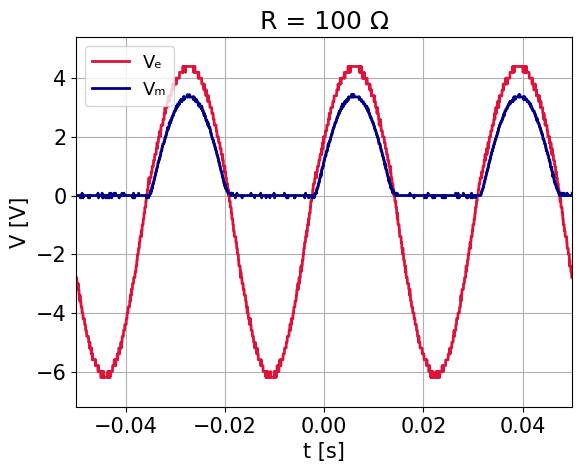

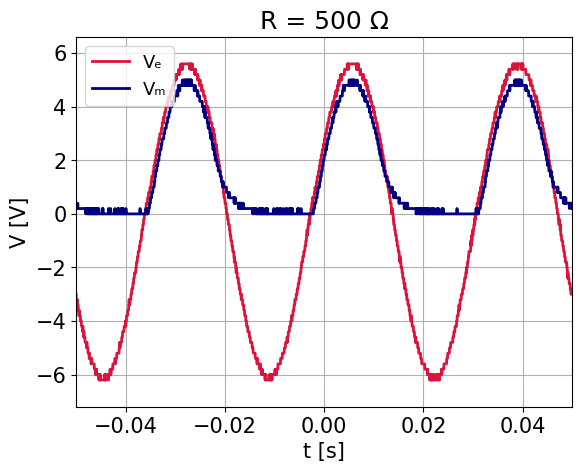

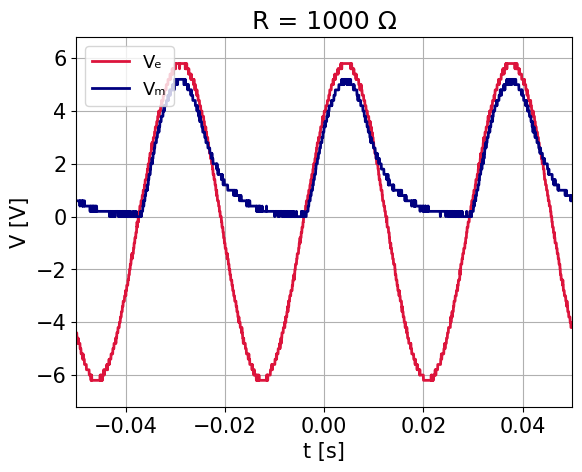

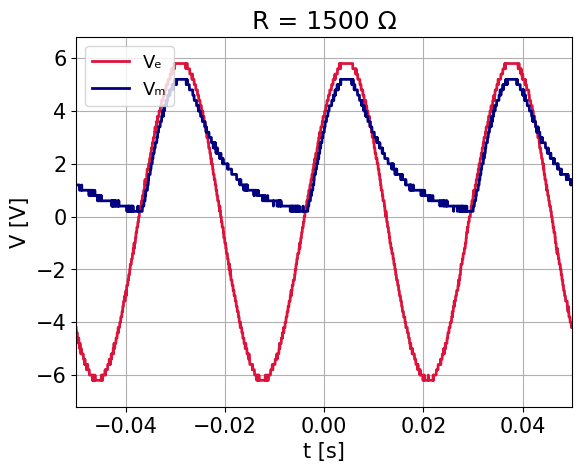

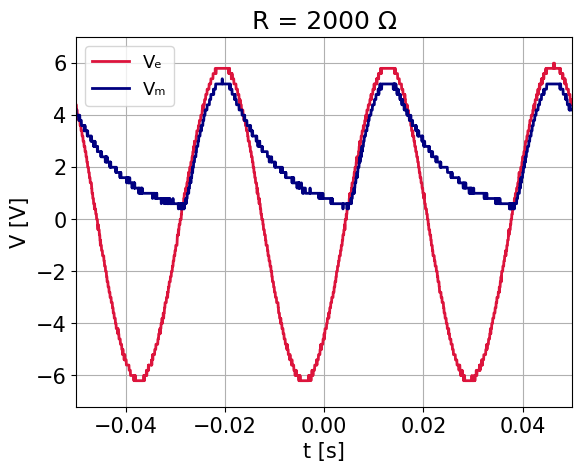

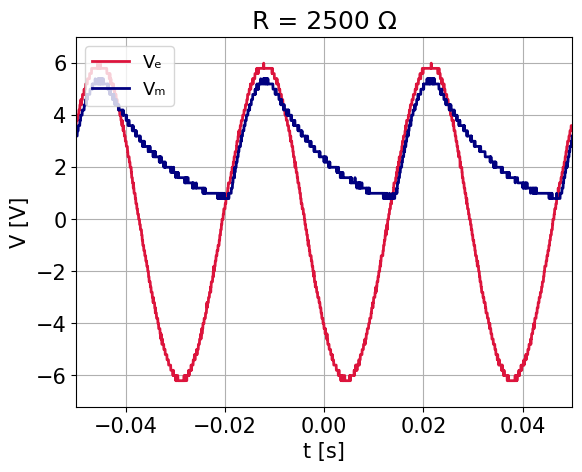

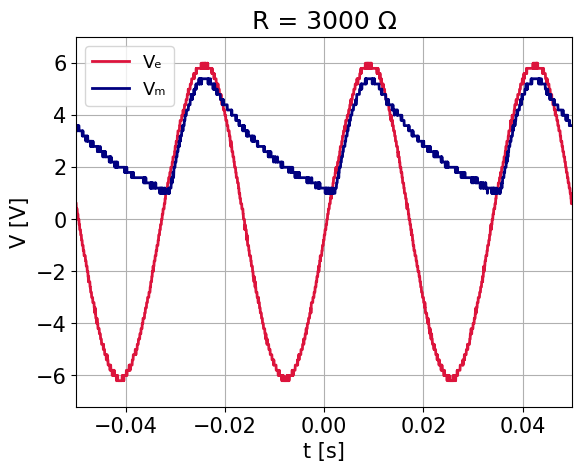

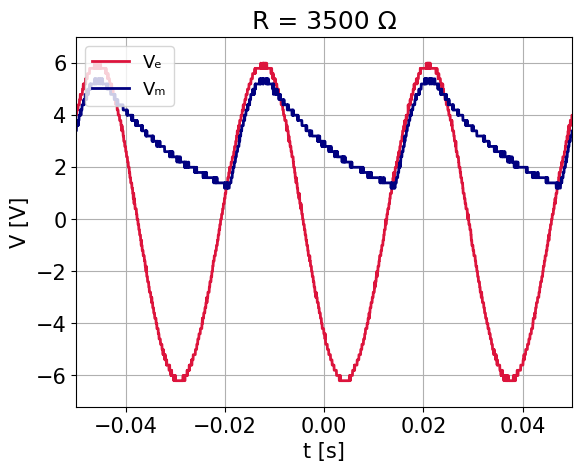

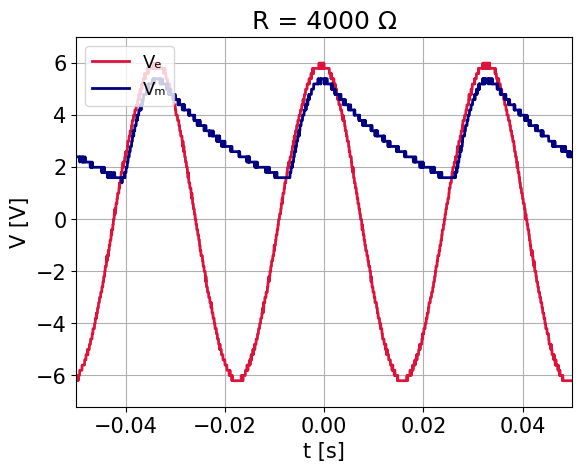

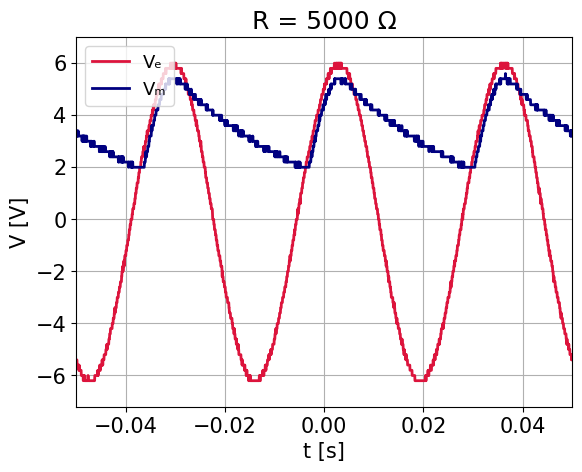

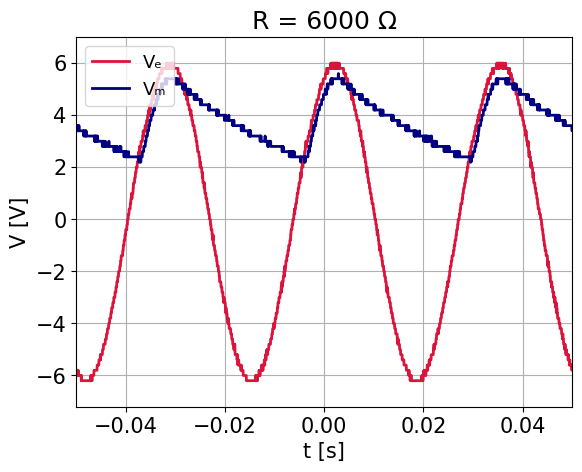

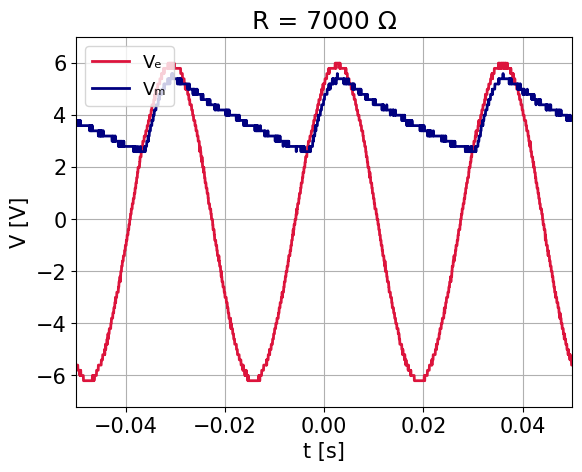

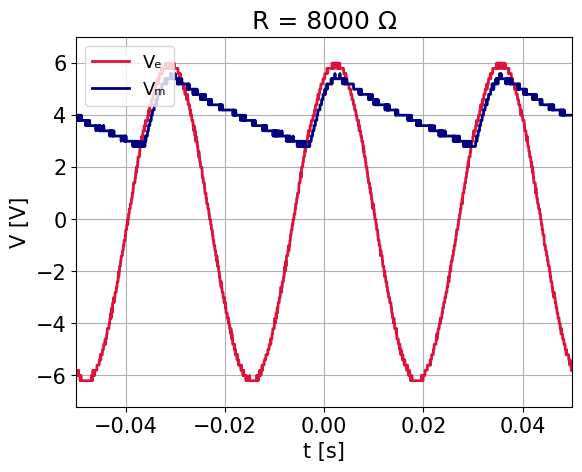

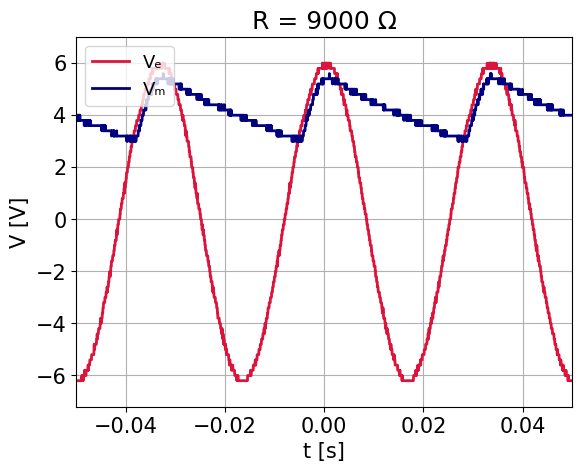

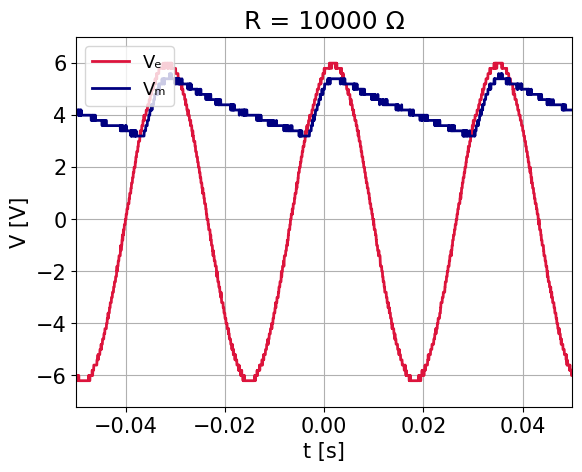

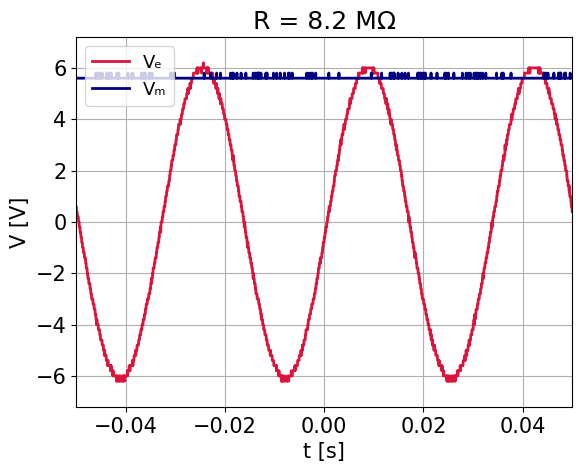

In [28]:
for file in files:
    df = pd.read_csv(f'Rectificador/{file}')
    
    plt.plot(df.t,df.V_R,'crimson',zorder=1,label='V\u2091')
    plt.plot(df.t,df.V_out,'navy',zorder=2,label='V\u2098')
    plt.xlim(min(df.t),max(df.t))
    plt.ylim(min(df.V_R)-1,max(df.V_R)+1)
    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.title(f'R = {file[:-4]} \u03A9')
    if file == '8200000.csv':
        plt.title(f'R = 8.2 M\u03A9')
    plt.legend(loc=2,fontsize=13)
    plt.grid()
    plt.show()